 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
whale_returns_csv_path = Path("whale_returns.csv")
whale_returns_df = pd.read_csv(whale_returns_csv_path)
whale_returns_df.head()

,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
0,2015-03-02,NaN,NaN,NaN,NaN
1,2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2,2015-03-04,0.002230,0.003241,-0.002534,0.004213
3,2015-03-05,0.004016,0.004076,0.002355,0.006726
4,2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
# Count nulls
whale_returns_df.isnull().sum(axis = 1)

0       4
1       0
2       0
3       0
4       0
       ..
1055    0
1056    0
1057    0
1058    0
1059    0
Length: 1060, dtype: int64

In [4]:
# Drop nulls
whale_returns_df.dropna()
# Correct columns to date time for whale_returns
whale_returns_df.set_index(pd.to_datetime(whale_returns_df['Date'], infer_datetime_format=True), inplace=True)
whale_returns_df.drop(columns=['Date'], inplace=True)

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [5]:
# Reading algorithmic returns
algo_returns_csv_path = Path("algo_returns.csv")
algo_returns_df = pd.read_csv(algo_returns_csv_path)

In [6]:
# Count nulls
algo_returns_df.isnull().sum(axis = 1)

0       1
1       1
2       1
3       1
4       1
       ..
1236    0
1237    0
1238    0
1239    0
1240    0
Length: 1241, dtype: int64

In [7]:
# Drop nulls
algo_returns_df.dropna()
algo_returns_df.set_index(pd.to_datetime(algo_returns_df['Date'], infer_datetime_format=True), inplace=True)
algo_returns_df.drop(columns=['Date'], inplace=True)

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [8]:
# Reading S&P 500 Closing Prices
sp500_history_csv_path = Path("sp500_history.csv")
sp500_history_df = pd.read_csv(sp500_history_csv_path)

In [9]:
# Check Data Types
sp500_history_df.dtypes

Date     object
Close    object
dtype: object

In [10]:
# Fix Data Types
sp500_history_df.columns = ['Date', 'Close']
sp500_history_df.set_index(pd.to_datetime(sp500_history_df['Date'], infer_datetime_format=True), inplace=True)
sp500_history_df.drop(columns=['Date'], inplace=True)
sp500_history_df

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06
...,...
2012-10-05,$1460.93
2012-10-04,$1461.40
2012-10-03,$1450.99


In [11]:
# changing Close datatype to float64 and removing dollar sign
sp500_history_df['Close'] = sp500_history_df['Close'].str.replace('$', '', regex=True).astype(float)
sp500_history_df.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1649 entries, 2019-04-23 to 2012-10-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   1649 non-null   float64
dtypes: float64(1)
memory usage: 25.8 KB


In [12]:
# Calculate Daily Returns
# Drop nulls
sp500_history_df.dropna()
daily_returns = sp500_history_df.pct_change().dropna()
daily_returns.std()

Close    0.008135
dtype: float64

In [13]:
# Rename `Close` Column to be specific to this portfolio.
daily_returns.rename(columns={'Close': 'SP500'}, inplace=True)
daily_returns.head()

,SP500
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


## Combine Whale, Algorithmic, and S&P 500 Returns

In [65]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_returns_df = pd.concat([whale_returns_df, algo_returns_df, daily_returns], axis="columns")
combined_returns_df.dropna()
combined_returns_df.std()
combined_returns_df.index = combined_returns_df.index.date

---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:>

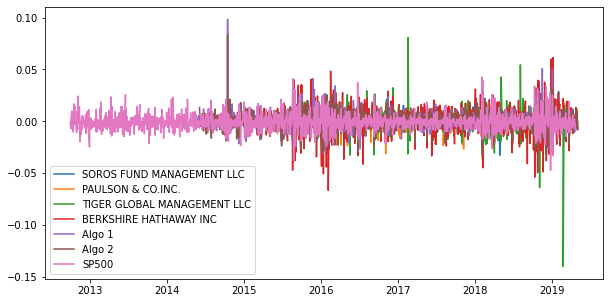

In [66]:
# Plot daily returns of all portfolios
combined_returns_df.plot(figsize=(10,5))

#### Calculate and Plot cumulative returns.

<AxesSubplot:>

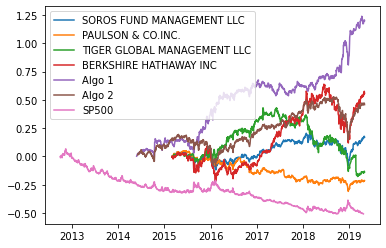

In [67]:
# Calculate cumulative returns of all portfolios
combined_returns_df.cumprod()
# Plot cumulative returns
((combined_returns_df + 1).cumprod() -1).plot()

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:xlabel='Date'>

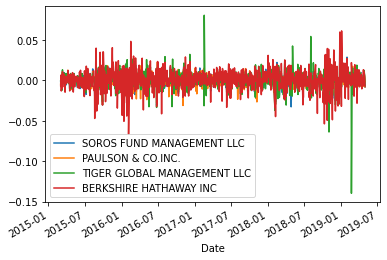

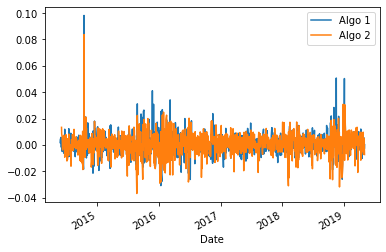

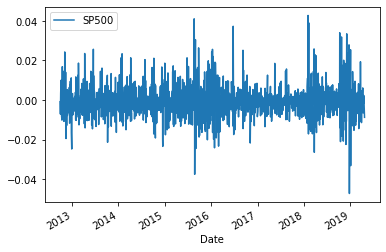

In [68]:
# Box plot to visually show risk
whale_returns_df.plot()
algo_returns_df.plot()
daily_returns.plot()

### Calculate Standard Deviations

In [69]:
# Calculate the daily standard deviations of all portfolios
combined_returns_df.std()

SOROS FUND MANAGEMENT LLC      0.007842
PAULSON & CO.INC.              0.006977
TIGER GLOBAL MANAGEMENT LLC    0.010824
BERKSHIRE HATHAWAY INC         0.012831
Algo 1                         0.007972
Algo 2                         0.008466
SP500                          0.008135
dtype: float64

In [70]:
print(daily_returns.std())

SP500    0.008135
dtype: float64


### Determine which portfolios are riskier than the S&P 500

In [71]:
# Calculate  the daily standard deviation of S&P 500
daily_returns.std()
# Determine which portfolios are riskier than the S&P 500
for i, v in combined_returns_df.std().iteritems():
    if i == "SP500":
        print("SP500")
    elif v > daily_returns.std()[0]:
        print(i, "riskier")
    elif v < daily_returns.std()[0]:
        print(i, "less risky")
   
        

SOROS FUND MANAGEMENT LLC less risky
PAULSON & CO.INC.  less risky
TIGER GLOBAL MANAGEMENT LLC riskier
BERKSHIRE HATHAWAY INC riskier
Algo 1 less risky
Algo 2 riskier
SP500


### Calculate the Annualized Standard Deviation

In [72]:
# Calculate the annualized standard deviation (252 trading days)
annual_std = combined_returns_df.std()/252
annual_std

SOROS FUND MANAGEMENT LLC      0.000031
PAULSON & CO.INC.              0.000028
TIGER GLOBAL MANAGEMENT LLC    0.000043
BERKSHIRE HATHAWAY INC         0.000051
Algo 1                         0.000032
Algo 2                         0.000034
SP500                          0.000032
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:>

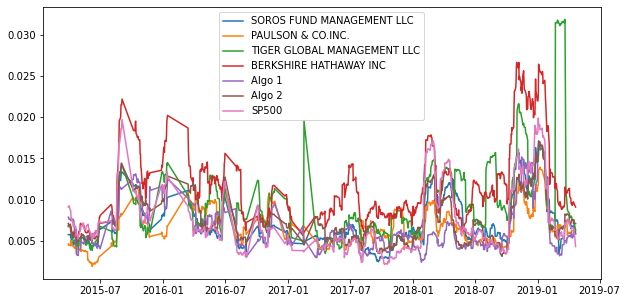

In [73]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_df = combined_returns_df.rolling(window=21).std().dropna()
rolling_df
# Plot the rolling standard deviation
rolling_df.plot(figsize=(10, 5))

### Calculate and plot the correlation

<AxesSubplot:>

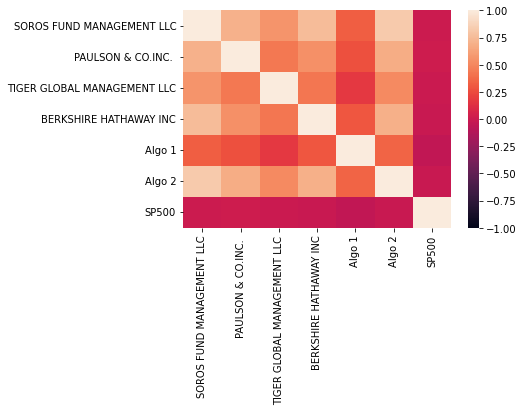

In [74]:
# Calculate the correlation
corr_returns = combined_returns_df.corr()
# Display de correlation matrix
import seaborn as sns
sns.heatmap(corr_returns, vmin=-1, vmax=1)

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

In [75]:
# Calculate covariance of a single portfolio
covariance = combined_returns_df.cov()

# Calculate variance of S&P 500
variance = daily_returns.var()

# Computing beta
beta = covariance/variance

# Plot beta trend
beta

,Algo 1,Algo 2,BERKSHIRE HATHAWAY INC,PAULSON & CO.INC.,SOROS FUND MANAGEMENT LLC,SP500,TIGER GLOBAL MANAGEMENT LLC
SOROS FUND MANAGEMENT LLC,NaN,NaN,NaN,NaN,NaN,0.000588,NaN
PAULSON & CO.INC.,NaN,NaN,NaN,NaN,NaN,0.012352,NaN
TIGER GLOBAL MANAGEMENT LLC,NaN,NaN,NaN,NaN,NaN,-0.002128,NaN
BERKSHIRE HATHAWAY INC,NaN,NaN,NaN,NaN,NaN,-0.023229,NaN
Algo 1,NaN,NaN,NaN,NaN,NaN,-0.048781,NaN
Algo 2,NaN,NaN,NaN,NaN,NaN,-0.012473,NaN
SP500,NaN,NaN,NaN,NaN,NaN,1.000000,NaN


## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

In [76]:
# Use `ewm` to calculate the rolling window
whale_returns_df.ewm(span=21).std()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,NaN,NaN,NaN,NaN
2015-03-04,0.002472,0.005814,0.001441,0.007624
2015-03-05,0.002658,0.004896,0.002519,0.006934
2015-03-06,0.005515,0.004592,0.004808,0.009585
...,...,...,...,...
2019-04-25,0.004773,0.005046,0.007946,0.007527
2019-04-26,0.004944,0.005556,0.008453,0.007608
2019-04-29,0.004722,0.005334,0.008218,0.007294


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [77]:
# Annualized Sharpe Ratios
sharpe_ratios = (combined_returns_df.mean() * 252) / (combined_returns_df.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.361568
PAULSON & CO.INC.             -0.462131
TIGER GLOBAL MANAGEMENT LLC   -0.118257
BERKSHIRE HATHAWAY INC         0.619628
Algo 1                         1.327397
Algo 2                         0.639258
SP500                         -0.774405
dtype: float64

<AxesSubplot:>

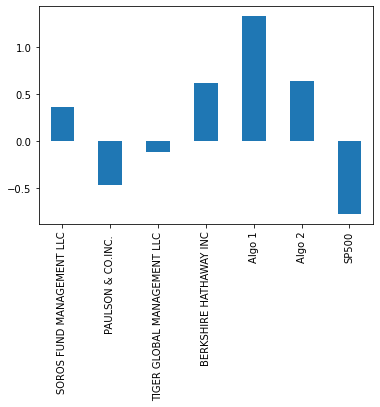

In [78]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot.bar()

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

In [79]:
# Based on these figures, both of the algorithmic strategies outperformed both the market (S&P 500) and the whales portfolios

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [80]:
# Reading data from 1st stock
BTC_returns_csv_path = Path("BTC_returns.csv")
BTC_returns_df = pd.read_csv(BTC_returns_csv_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
BTC_returns_df.head()

,Close
Date,
2017-01-01 23:58:00,992.95
2017-01-02 23:58:00,1011.45
2017-01-03 23:58:00,1020.67
2017-01-04 23:58:00,1130.30
2017-01-05 23:58:00,1007.00


In [81]:
BTC_returns_df.index

DatetimeIndex(['2017-01-01 23:58:00', '2017-01-02 23:58:00',
               '2017-01-03 23:58:00', '2017-01-04 23:58:00',
               '2017-01-05 23:58:00', '2017-01-06 23:58:00',
               '2017-01-07 23:58:00', '2017-01-08 23:58:00',
               '2017-01-09 23:58:00', '2017-01-10 23:58:00',
               ...
               '2022-02-26 23:58:00', '2022-02-27 23:58:00',
               '2022-02-28 23:58:00', '2022-03-01 23:58:00',
               '2022-03-02 23:58:00', '2022-03-03 23:58:00',
               '2022-03-04 23:58:00', '2022-03-05 23:58:00',
               '2022-03-06 23:58:00', '2022-03-07 23:58:00'],
              dtype='datetime64[ns]', name='Date', length=1892, freq=None)

In [82]:
# Reading data from 2nd stock
ETH_returns_csv_path = Path("ETH_returns.csv")
ETH_returns_df = pd.read_csv(ETH_returns_csv_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
ETH_returns_df.head()

,Close
Date,
2017-01-01 23:58:00,8.18
2017-01-02 23:58:00,8.38
2017-01-03 23:58:00,9.59
2017-01-04 23:58:00,11.17
2017-01-05 23:58:00,10.23


In [83]:
# Reading data from 3rd stock
TSLA_returns_csv_path = Path("TSLA_returns.csv")
TSLA_returns_df = pd.read_csv(TSLA_returns_csv_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
TSLA_returns_df.head()

# TSLA_returns_df.rename(columns={'Close': 'TSLA'}, inplace=True)

,Close
Date,
2017-01-03 16:00:00,43.40
2017-01-04 16:00:00,45.40
2017-01-05 16:00:00,45.35
2017-01-06 16:00:00,45.80
2017-01-09 16:00:00,46.26


In [84]:
# Combine all stocks in a single DataFrame
combined_milli_df = pd.concat([BTC_returns_df, ETH_returns_df, TSLA_returns_df], axis="columns")

# Sort datetime index
combined_milli_df.sort_index(inplace=True)

In [85]:

combined_milli_df.head()

,Close,Close,Close
Date,,,
2017-01-01 23:58:00,992.95,8.18,NaN
2017-01-02 23:58:00,1011.45,8.38,NaN
2017-01-03 16:00:00,NaN,NaN,43.4
2017-01-03 23:58:00,1020.67,9.59,NaN
2017-01-04 16:00:00,NaN,NaN,45.4


In [86]:
# Reset Date index
combined_milli_df.reset_index()


,Date,Close,Close,Close
0,2017-01-01 23:58:00,992.95,8.18,NaN
1,2017-01-02 23:58:00,1011.45,8.38,NaN
2,2017-01-03 16:00:00,NaN,NaN,43.40
3,2017-01-03 23:58:00,1020.67,9.59,NaN
4,2017-01-04 16:00:00,NaN,NaN,45.40
...,...,...,...,...
3190,2022-03-04 23:58:00,39166.40,2616.54,NaN
3191,2022-03-05 23:58:00,39412.90,2665.77,NaN
3192,2022-03-06 23:58:00,38408.00,2550.46,NaN
3193,2022-03-07 16:00:00,NaN,NaN,804.58


In [87]:
# Reorganize portfolio data by having a column per symbol
combined_milli_df.columns = ["BTC", "ETH", "TSLA"]
combined_milli_df


,BTC,ETH,TSLA
Date,,,
2017-01-01 23:58:00,992.95,8.18,NaN
2017-01-02 23:58:00,1011.45,8.38,NaN
2017-01-03 16:00:00,NaN,NaN,43.40
2017-01-03 23:58:00,1020.67,9.59,NaN
2017-01-04 16:00:00,NaN,NaN,45.40
...,...,...,...
2022-03-04 23:58:00,39166.40,2616.54,NaN
2022-03-05 23:58:00,39412.90,2665.77,NaN
2022-03-06 23:58:00,38408.00,2550.46,NaN


In [88]:
print(combined_milli_df.columns.tolist())

combined_milli_df.sort_index()
combined_milli_df.dropna()
#date only



['BTC', 'ETH', 'TSLA']


,BTC,ETH,TSLA
Date,,,


In [89]:
# Calculate daily returns
daily_return = combined_milli_df.pct_change(1)

# Drop NAs
daily_return = daily_return.dropna()

#change date + time to date only
daily_return.index = daily_return.index.date

# Display sample data
daily_return.head()

,BTC,ETH,TSLA
2017-01-03,0.009116,0.144391,0.000000
2017-01-04,0.000000,0.000000,0.046083
2017-01-04,0.107410,0.164755,0.000000
2017-01-05,0.000000,0.000000,-0.001101
2017-01-05,-0.109086,-0.084154,0.000000


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [90]:
# # Set weights
# weights = [1/3, 1/3, 1/3]

# # Calculate portfolio return
# #ret_data = daily_return.pct_change()
# #weighted_returns = (weights * ret_data)
# weighted_returns.dropna()

# # Display sample data
# print(weighted_returns)

In [91]:
# Set weights
weights = [1/3, 1/3, 1/3]
weights

[0.3333333333333333, 0.3333333333333333, 0.3333333333333333]

In [92]:
# Calculate portfolio return



In [93]:
weighted_returns = daily_return.dot(weights)
weighted_returns.head()

2017-01-03    0.051169
2017-01-04    0.015361
2017-01-04    0.090722
2017-01-05   -0.000367
2017-01-05   -0.064413
dtype: float64

In [94]:
#weighted_returns.dropna()
weighted_returns = weighted_returns.dropna()
weighted_returns.head()

2017-01-03    0.051169
2017-01-04    0.015361
2017-01-04    0.090722
2017-01-05   -0.000367
2017-01-05   -0.064413
dtype: float64

In [95]:
print(weighted_returns)

2017-01-03    0.051169
2017-01-04    0.015361
2017-01-04    0.090722
2017-01-05   -0.000367
2017-01-05   -0.064413
                ...   
2022-03-04   -0.051416
2022-03-05    0.008370
2022-03-06   -0.022918
2022-03-07   -0.013404
2022-03-07   -0.011242
Length: 3192, dtype: float64


In [96]:
combined_returns_df.index

Index([2012-10-01, 2012-10-02, 2012-10-03, 2012-10-04, 2012-10-05, 2012-10-08,
       2012-10-09, 2012-10-10, 2012-10-11, 2012-10-12,
       ...
       2019-04-17, 2019-04-18, 2019-04-22, 2019-04-23, 2019-04-24, 2019-04-25,
       2019-04-26, 2019-04-29, 2019-04-30, 2019-05-01],
      dtype='object', length=1665)

In [97]:
# cumulative return
portfolio_returns = weighted_returns.sum()
cumulative_ret = (portfolio_returns + 1).cumprod()
print(cumulative_ret)

[6.99532661]


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [104]:
# Join your returns DataFrame to the original returns DataFrame
# combine dataframes - combined_returns_df & daily_return
total_df = pd.concat([combined_returns_df, daily_return], axis=1)


total_df = total_df.loc[total_df.index.duplicated(keep='first')]

NameError: name 'total_df' is not defined

In [111]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
total_df.dropna()
total_df.head()

,index,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500,BTC,ETH,TSLA
0,2012-10-01,NaN,NaN,NaN,NaN,NaN,NaN,-0.000872,NaN,NaN,NaN
1,2012-10-02,NaN,NaN,NaN,NaN,NaN,NaN,-0.003611,NaN,NaN,NaN
2,2012-10-03,NaN,NaN,NaN,NaN,NaN,NaN,-0.007123,NaN,NaN,NaN
3,2012-10-04,NaN,NaN,NaN,NaN,NaN,NaN,0.000322,NaN,NaN,NaN
4,2012-10-05,NaN,NaN,NaN,NaN,NaN,NaN,0.003469,NaN,NaN,NaN


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [112]:
# Calculate the annualized `std`
total_df.std()

C:\Users\jalle\AppData\Local\Temp/ipykernel_17808/3116732139.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  total_df.std()


SOROS FUND MANAGEMENT LLC      0.007842
PAULSON & CO.INC.              0.006977
TIGER GLOBAL MANAGEMENT LLC    0.010824
BERKSHIRE HATHAWAY INC         0.012831
Algo 1                         0.007972
Algo 2                         0.008466
SP500                          0.008135
BTC                            0.032761
ETH                            0.043837
TSLA                           0.024505
dtype: float64

### Calculate and plot rolling `std` with 21-day window

In [117]:
# Calculate rolling standard deviation
rolling_std = total_df.rolling(window=30)
# Plot rolling standard deviation
ax = rolling_std.plot(figsize=(20, 10), title='Rolling 21 Day STD of all')

AttributeError: 'Rolling' object has no attribute 'plot'

### Calculate and plot the correlation

In [118]:
# Calculate and plot the correlation
total_df.corr()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500,BTC,ETH,TSLA
SOROS FUND MANAGEMENT LLC,1.000000,0.700181,0.561745,0.754308,0.321366,0.826719,0.000574,NaN,NaN,NaN
PAULSON & CO.INC.,0.700181,1.000000,0.435333,0.545802,0.269257,0.677993,0.013549,NaN,NaN,NaN
TIGER GLOBAL MANAGEMENT LLC,0.561745,0.435333,1.000000,0.425102,0.164840,0.508139,-0.001505,NaN,NaN,NaN
BERKSHIRE HATHAWAY INC,0.754308,0.545802,0.425102,1.000000,0.292307,0.687717,-0.013856,NaN,NaN,NaN
Algo 1,0.321366,0.269257,0.164840,0.292307,1.000000,0.346568,-0.047967,NaN,NaN,NaN
Algo 2,0.826719,0.677993,0.508139,0.687717,0.346568,1.000000,-0.011537,NaN,NaN,NaN
SP500,0.000574,0.013549,-0.001505,-0.013856,-0.047967,-0.011537,1.000000,NaN,NaN,NaN
BTC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.687035,-0.002535
ETH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.687035,1.000000,-0.003101
TSLA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.002535,-0.003101,1.000000


### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

In [ ]:
# Calculate and plot Beta


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [ ]:
# Calculate Annualized Sharpe Ratios


In [ ]:
# Visualize the sharpe ratios as a bar plot


### How does your portfolio do?

Write your answer here!